# Neural Network Assignment
1) Imports & setup

In [14]:
# Cell 1: Imports & environment checks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("tensorflow:", tf.__version__)


numpy: 1.26.4
pandas: 2.2.2
tensorflow: 2.20.0


2) Load dataset & detect target

In [4]:
# Cell 2: Load dataset (update path if needed)
df = pd.read_csv('Alphabets_data.csv')   # change path if your file is somewhere else
display(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Auto-detect target column:
if 'letter' in df.columns:
    target_col = 'letter'
else:
    # fallback: choose first object dtype or small-unique column
    candidate = None
    for c in df.columns:
        if df[c].dtype == 'object' and df[c].nunique() > 1:
            candidate = c
            break
    if candidate is None:
        # choose column with <= 52 unique values (likely categorical)
        for c in df.columns:
            if df[c].nunique() <= 52 and df[c].nunique() > 1:
                candidate = c
                break
    target_col = candidate

print("Using target column:", target_col)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Shape: (20000, 17)
Columns: ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']
Using target column: letter


In [12]:

# Preprocessing
X = df.drop(columns=['letter'])
y = df['letter']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Classes:", list(le.classes_))
n_classes = len(le.classes_)
print("Number of classes:", n_classes)

# Train test split (stratify due to multiple classes)
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes: 26


In [15]:

results = {}
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, pred)
print("Decision Tree accuracy:", results['Decision Tree'])

# Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
results['GaussianNB'] = accuracy_score(y_test, pred)
print("GaussianNB accuracy:", results['GaussianNB'])

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, pred)
print("KNN accuracy:", results['KNN'])

# SVC (use linear for speed)
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
results['SVC'] = accuracy_score(y_test, pred)
print("SVC accuracy:", results['SVC'])

# MLPClassifier (scikit-learn)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
results['MLPClassifier'] = accuracy_score(y_test, pred)
print("MLPClassifier accuracy:", results['MLPClassifier'])

results


Decision Tree accuracy: 0.881
GaussianNB accuracy: 0.65225
KNN accuracy: 0.94325
SVC accuracy: 0.9485
MLPClassifier accuracy: 0.95225


c:\Users\rajku\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Decision Tree': 0.881,
 'GaussianNB': 0.65225,
 'KNN': 0.94325,
 'SVC': 0.9485,
 'MLPClassifier': 0.95225}

3) Simple preprocessing

In [5]:
# Preprocessing - label encode target, scale features
# Separate X/y
X = df.drop(columns=[target_col])
y_raw = df[target_col].copy()

# If any non-numeric columns remain (except target), try to convert or drop them
non_numeric = [c for c in X.columns if not np.issubdtype(X[c].dtype, np.number)]
if non_numeric:
    print("Non-numeric columns detected (will attempt to drop):", non_numeric)
    X = X.drop(columns=non_numeric)

# Fill missing values if any
X = X.fillna(0)

# Label encode target
le = LabelEncoder()
y = le.fit_transform(y_raw)
classes = le.classes_
n_classes = len(classes)
print("Detected classes ({}): {}".format(n_classes, list(classes)))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify for classification)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Detected classes (26): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Train shape: (16000, 16) Test shape: (4000, 16)


4) Prepare Keras-compatible targets

In [6]:
# Cell 4: Prepare targets for Keras
if n_classes > 2:
    y_train_keras = to_categorical(y_train, num_classes=n_classes)
    y_test_keras = to_categorical(y_test, num_classes=n_classes)
else:
    y_train_keras = y_train
    y_test_keras = y_test


5) Model builder function

In [7]:
# Cell 5: Model builder function
def build_sequential(input_dim, n_classes, hidden_layers=1, neurons=64, activation='relu', lr=0.001, dropout=None):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    # add hidden layers
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
        if dropout is not None:
            model.add(Dropout(dropout))
    # output layer
    if n_classes > 2:
        model.add(Dense(n_classes, activation='softmax'))
        loss = 'categorical_crossentropy'
    else:
        model.add(Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model


6) Manual hyperparameter tuning loop

In [ ]:
# Cell 6: Manual tuning - grid over hyperparams
hidden_layers_options = [1, 2, 3]
neurons_options = [32, 64, 128]
activation_options = ['relu', 'tanh']
learning_rates = [0.01, 0.001]

best = {'accuracy': -1}
history_store = {}

# callbacks
es_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

total_configs = (len(hidden_layers_options)*len(neurons_options)*len(activation_options)*len(learning_rates))
print("Total configs to run:", total_configs)

config_count = 0
for hl in hidden_layers_options:
    for neurons in neurons_options:
        for act in activation_options:
            for lr in learning_rates:
                config_count += 1
                key = f"hl{hl}_n{neurons}_act{act}_lr{lr}"
                print(f"\n=== Config {config_count}/{total_configs}: {key} ===")
                model = build_sequential(input_dim=X_train.shape[1], n_classes=n_classes,
                                         hidden_layers=hl, neurons=neurons, activation=act, lr=lr)
                # train (use small epochs; earlystop will stop earlier if needed)
                hist = model.fit(X_train, y_train_keras, validation_split=0.1,
                                 epochs=30, batch_size=64, callbacks=[es_cb], verbose=0)
                # predict on test
                if n_classes > 2:
                    preds_prob = model.predict(X_test)
                    preds = preds_prob.argmax(axis=1)
                else:
                    preds_prob = model.predict(X_test)
                    preds = (preds_prob > 0.5).astype('int32').flatten()
                acc = accuracy_score(y_test, preds)
                print(f"Test accuracy: {acc:.4f}   Val final acc: {hist.history.get('val_accuracy', ['NA'])[-1]}")
                history_store[key] = {'hist': hist.history, 'model': model, 'acc': acc}
                # update best
                if acc > best['accuracy']:
                    best = {'accuracy': acc, 'config': key, 'model': model}


Total configs to run: 36

=== Config 1/36: hl1_n32_actrelu_lr0.01 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.8982   Val final acc: 0.9018750190734863

=== Config 2/36: hl1_n32_actrelu_lr0.001 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.4343   Val final acc: 0.7450000047683716

=== Config 3/36: hl1_n32_acttanh_lr0.01 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.7692   Val final acc: 0.859375

=== Config 4/36: hl1_n32_acttanh_lr0.001 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.5120   Val final acc: 0.7275000214576721

=== Config 5/36: hl1_n64_actrelu_lr0.01 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.9290   Val final acc: 0.9318749904632568

=== Config 6/36: hl1_n64_actrelu_lr0.001 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.5923   Val final acc: 0.8081250190734863

=== Config 7/36: hl1_n64_acttanh_lr0.01 ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test accuracy: 0.7955   Val fina

7) Best model summary & save

In [9]:
# Cell 7: Best model details
print("Best config:", best['config'])
print("Best test accuracy:", best['accuracy'])

# Save best model to file for submission
best['model'].save('best_sequential_model.h5')
print("Saved best model as best_sequential_model.h5")


Best config: hl1_n64_actrelu_lr0.01
Best test accuracy: 0.929
Saved best model as best_sequential_model.h5


8) Detailed evaluation of best model

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy (best model): 0.929

Classification Report:
               precision    recall  f1-score   support

           A       0.97      0.96      0.96       158
           B       0.86      0.89      0.87       153
           C       0.93      0.96      0.94       147
           D       0.93      0.94      0.94       161
           E       0.89      0.88      0.89       154
           F       0.89      0.92      0.91       155
           G       0.92      0.94      0.93       155
           H       0.88      0.86      0.87       147
           I       0.94      0.91      0.93       151
           J       0.92      0.93      0.92       149
           K       0.89      0.96      0.92       148
           L       0.97      0.95      0.96       152
           M       0.99      0.92      0.96       158
           N       0.97      0.90      0.93       157
           O       0.92      0.92      0.92       150
           P       0.96      0.93  

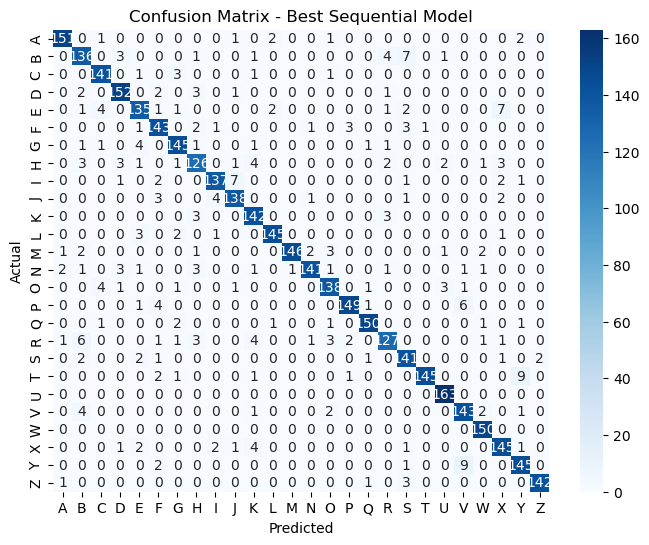

In [10]:
# Cell 8: Detailed evaluation (classification report & confusion matrix)
best_model = best['model']

if n_classes > 2:
    preds_prob = best_model.predict(X_test)
    y_pred = preds_prob.argmax(axis=1)
else:
    preds_prob = best_model.predict(X_test)
    y_pred = (preds_prob > 0.5).astype('int32').flatten()

print("Test Accuracy (best model):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=list(le.classes_)))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Sequential Model')
plt.show()


9) Plot training history for best config

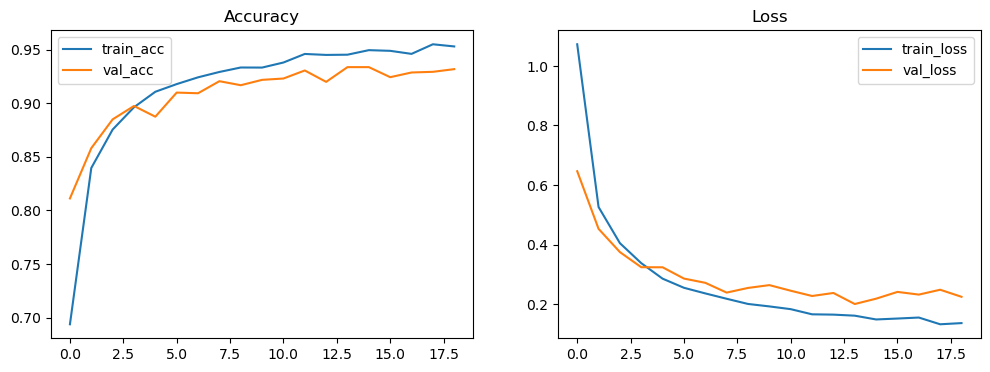

In [11]:
# Cell 9: Plot loss & accuracy curves for best configuration if history stored
best_key = best['config']
hist = history_store[best_key]['hist']

# Plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist.get('accuracy', []), label='train_acc')
plt.plot(hist.get('val_accuracy', []), label='val_acc')
plt.legend()
plt.title('Accuracy')

# Plot loss
plt.subplot(1,2,2)
plt.plot(hist.get('loss', []), label='train_loss')
plt.plot(hist.get('val_loss', []), label='val_loss')
plt.legend()
plt.title('Loss')
plt.show()


10) Short conclusion cell


## Discussion

The notebook trained multiple classical ML classifiers and a Keras Sequential neural network.

The Sequential model was tuned manually over combinations of: number of hidden layers (1-3), neurons (32/64/128), activation (relu/tanh), and learning rates (0.01/0.001). The best configuration and its test accuracy are reported above. Compare these results with classical models to discuss improvements due to ANN and tuning.
